# Social_Network_Ads.csv dataset

# Logistic Regression

Independent attributes data:
      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
Dependent attributes data:
 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
======================= BREAK ===========================


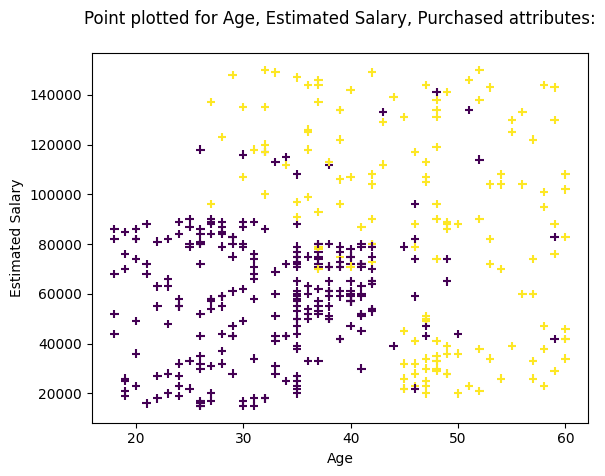

======================= BREAK ===========================
Confusion matrix:
 [[65  3]
 [ 8 24]]
======================= BREAK ===========================
Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

======================= BREAK ===========================
Logistic Regression Model Score:
 0.89


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading data
df = pd.read_csv('Social_Network_Ads.csv')


# DS coll names: User_ID,	Gender,	Age,	EstimatedSalary,	Purchased
# index             0       1      2           3              4
# indexing start form 0


# Selection row and columns
x = df.iloc[:, 2:4]   # Independent variables (Age, EstimatedSalary)
y = df.iloc[:, 4]     # Dependent variable (Purchased)

# `[:, 2:4]` →  Selects all rows (:) and columns 2 and 3 (Python slicing excludes index 4).
# [:, 4] → Selects column index 4 → the Purchased column



print("Independent attributes data:\n", x)
print("Dependent attributes data:\n", y)


print("======================= BREAK ===========================")  # just a line

# Scatter Plotting points for different attributes
plt.scatter(df.Age, df.EstimatedSalary, c=df.Purchased, marker='+', cmap='viridis')
plt.title('Point plotted for Age, Estimated Salary, Purchased attributes:\n')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.show()


#======================= BREAK ===========================


# Split dataset into Train set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# test_size=0.25 → 25% test, 75% train.
# random_state=0 → fixes randomization (so same split every time).



#======================= BREAK ===========================



# Feature Scaling StandardScaler class
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# StandardScaler: Its job is to scale features so that they all have the same range and mean = 0, standard deviation = 1.
# fit_transform: learn + scale on training set.
# transform: scale test set using training stats.

#======================= BREAK ===========================



# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
# .fit() trains model on scaled training data.


#======================= BREAK ===========================


# Predictions
y_pred = model.predict(x_test)

# Uses trained model to predict outcomes (0 or 1) for test data.

print("======================= BREAK ===========================")  # just a line


# Confusion Matrix production
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Confusion Matrix → compares predicted vs actual.

print("======================= BREAK ===========================")  # just a line


# Classification Report
print("Classification_report:\n", classification_report(y_test, y_pred))

print("======================= BREAK ===========================")  # just a line


# Model Score
print("Logistic Regression Model Score:\n", model.score(x_test, y_test))

# tennis.csv dataset

======================= BREAK ===========================
Data=
     out  tmp  hum  wnd  cls
0     2    1    0    0    0
1     2    1    0    1    0
2     0    1    0    0    1
3     1    2    0    0    1
4     1    0    1    0    1
5     1    0    1    1    0
6     0    0    1    1    1
7     2    2    0    0    0
8     2    0    1    0    1
9     1    2    1    0    1
10    2    2    1    1    1
11    0    2    0    1    1
12    0    1    1    0    1
13    1    2    0    1    0
Input=
     out  tmp  hum  wnd
0     2    1    0    0
1     2    1    0    1
2     0    1    0    0
3     1    2    0    0
4     1    0    1    0
5     1    0    1    1
6     0    0    1    1
7     2    2    0    0
8     2    0    1    0
9     1    2    1    0
10    2    2    1    1
11    0    2    0    1
12    0    1    1    0
13    1    2    0    1
Output=
 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: cls, dtype: int64
Modelscore= 1.0


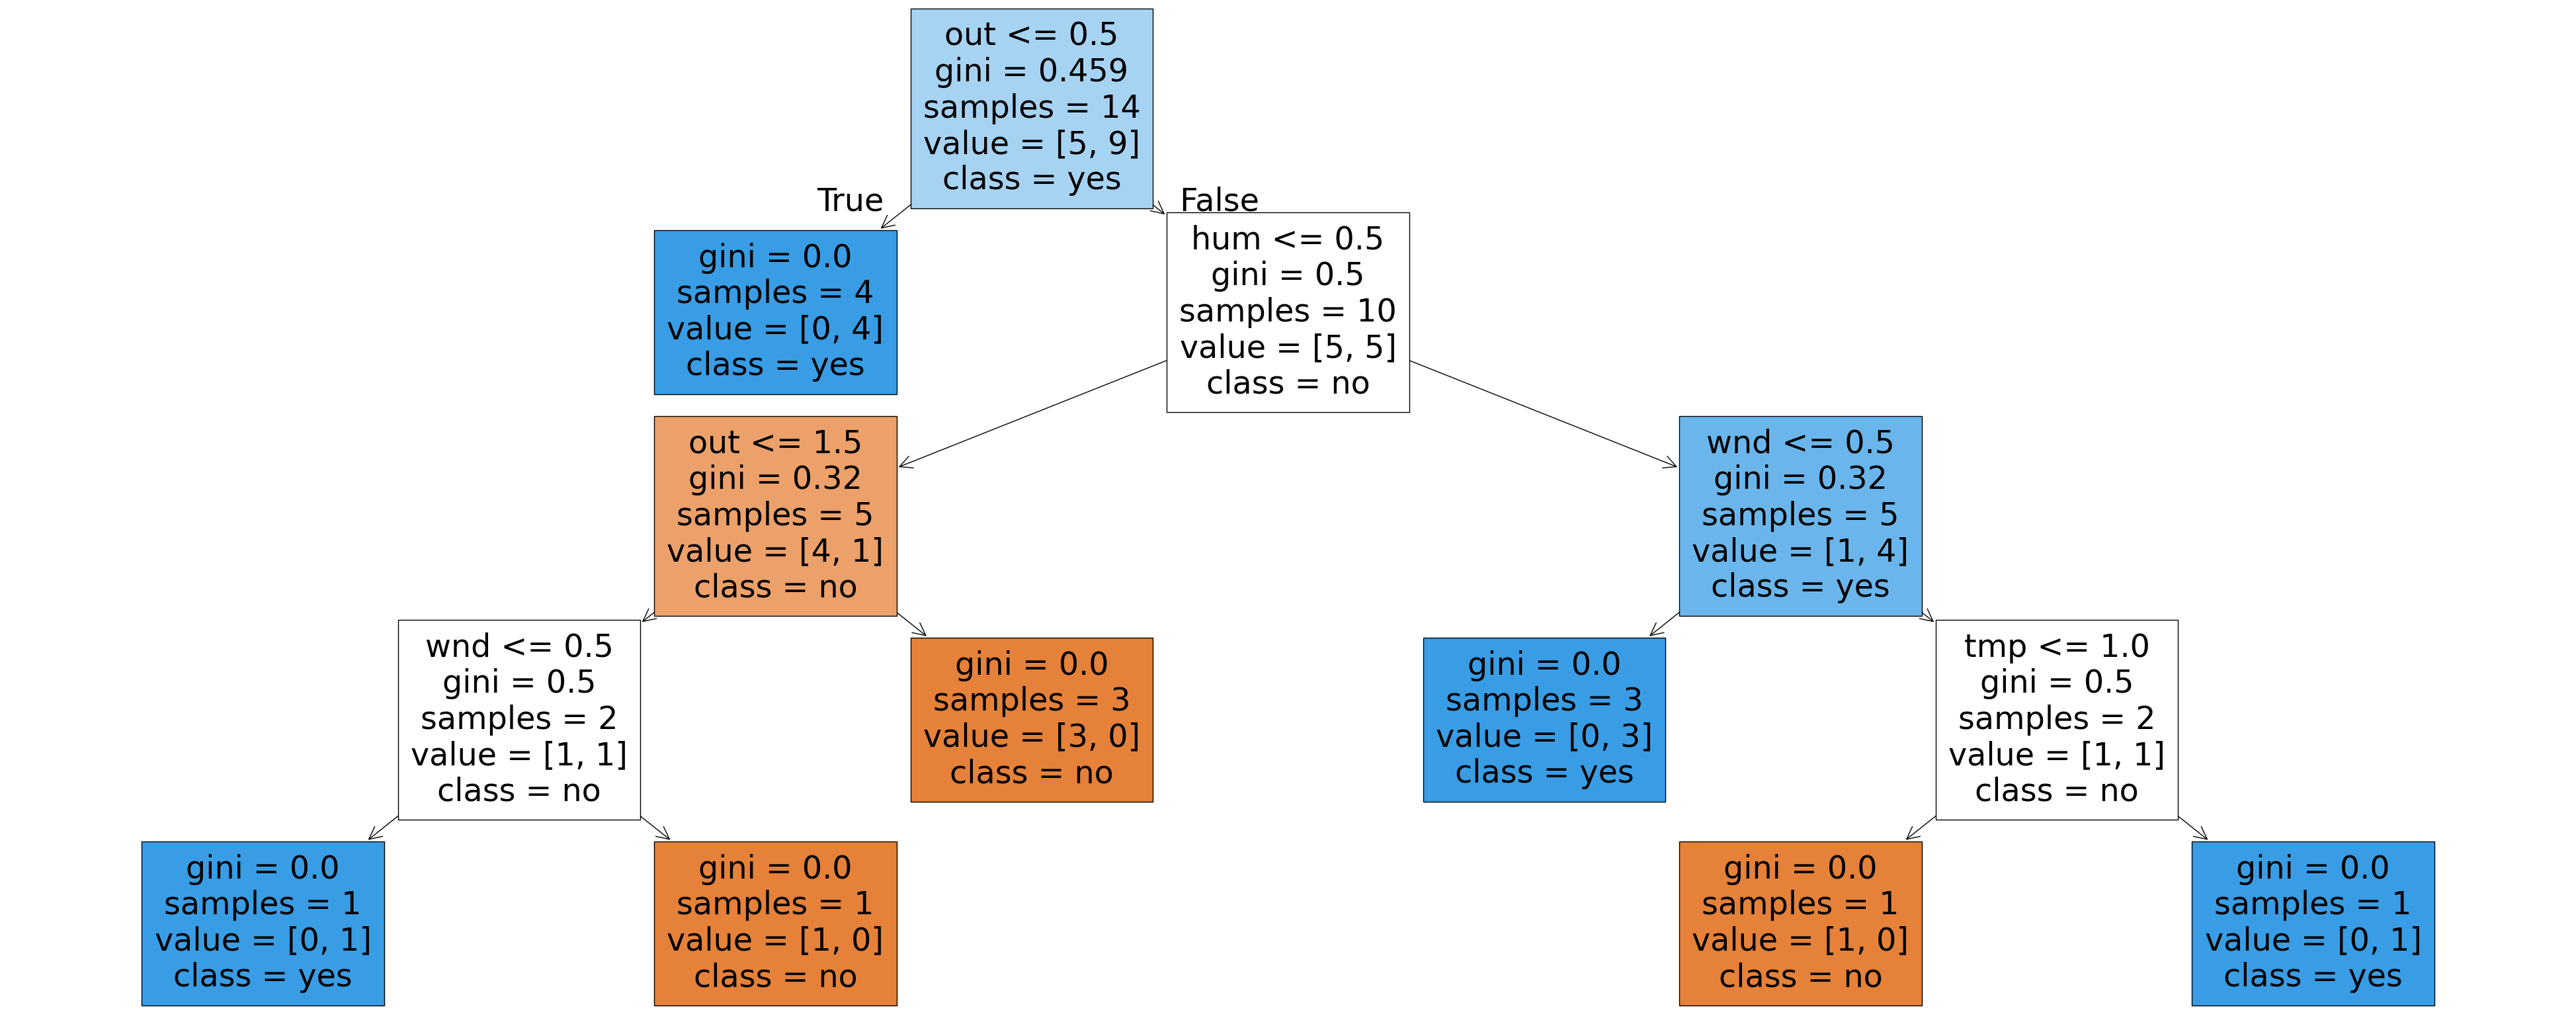

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('tennis.csv')


print("======================= BREAK ===========================")  # just a line
#======================= BREAK ===========================


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# LabelEncoder → converts categorical text data to numbers.
# Example: "Sunny" → 2, "Overcast" → 0, "Rain" → 1

#======================= BREAK ===========================


df['out'] = le.fit_transform(df['outlook'])
df['tmp'] = le.fit_transform(df['temp'])
df['hum'] = le.fit_transform(df['humidity'])
df['wnd'] = le.fit_transform(df['windy'])
df['cls'] = le.fit_transform(df['play'])


# Each column is transformed into numbers:
# | Original | Encoded |
# |----------|-------- |
# | outlook  | out     |
# | temp     | tmp     |
# | humidity | hum     |
# | windy    | wnd     |
# | play     | cls     |
# ----------------------

# fit_transform → learn mapping + apply encoding.

#======================= BREAK ===========================



df = df.drop(['outlook', 'temp', 'humidity', 'windy', 'play'], axis='columns')
# Removes original text columns (we only need numeric columns).
# Now df only contains: out, tmp, hum, wnd, cls

#======================= BREAK ===========================

in_var = df.drop('cls', axis='columns')
x = in_var
dp_var = df['cls']
y = dp_var

#======================= BREAK ===========================


print("Data=\n", df)
print("Input=\n", in_var)
print("Output=\n", dp_var)
# Prints transformed dataset, inputs, and output.


#======================= BREAK ===========================


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = tree.DecisionTreeClassifier()
model.fit(in_var, dp_var)

# .fit() → trains the model on the input features and target.

#======================= BREAK ===========================


Mscore = model.score(in_var, dp_var)
print("Modelscore=", Mscore)

# .score() → accuracy on the training data.


#======================= BREAK ===========================


# model.predict([[1,0,1,0]])
plt.figure(figsize=(50, 20))
plot_tree(model, filled=True, feature_names=df.columns, class_names=le.classes_)
plt.show()




# Salary_Data.csv dataset

# Linear Regression

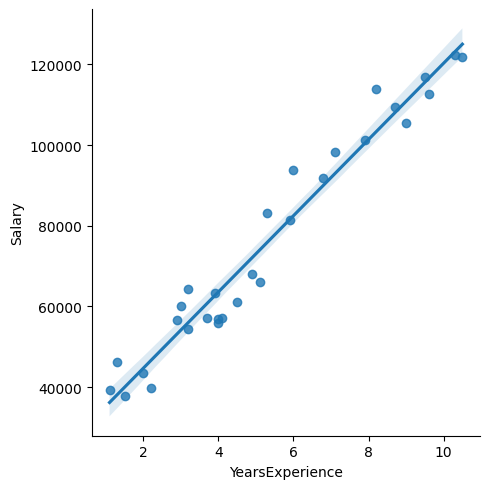

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# Seaborn is a library for making statistical graphics in Python.


from sklearn import linear_model

df = pd.read_csv('Salary_Data.csv')
sns.lmplot(x='YearsExperience', y='Salary', data=df)

# lmplot → stands for linear model plot.
# data=df → DataFrame containing these columns.



# Data1.csv dataset


In [16]:
import numpy as np  # import NumPy library into current program.
import matplotlib.pyplot as plt  # bring pyplot module from matplotlib library
import pandas as pd  # Pandas library for data manipulation and analysis, for tabular data.


#======================= BREAK ===========================
print("======================= BREAK ===========================")  # just a line


dataset = pd.read_csv('Data1.csv')


X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# X → all columns except last → independent variables (features).
# Y → last column → dependent variable (target).
# .values → converts from DataFrame to NumPy array.


print(X)
print(Y)


print("======================= BREAK ===========================")  # just a line


# Handle Missing Data
from sklearn.impute import SimpleImputer  # SimpleImputer class; sklearn.impute module handling missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#======================= BREAK ===========================

imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

# X[:, 1:3] → selects columns 1 and 2 (Age and Salary).
# .transform() → replaces missing values with the mean.




# Specifically, when imputer.fit(X) is called on a dataset X containing missing values,
# the imputer calculates and stores the statistics (e.g., mean, median, or most frequent value)
# of each column based on the observed values within that column.
# These calculated statistics will then be used to replace the missing values during the transform() step.

#======================= BREAK ===========================


# one hot encoding
from sklearn.compose import ColumnTransformer  # ColumnTransformer allows a OneHotEncoder
# sklearn.compose module for handling heterogeneous data
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder transforms categorical features into a numerical representation
# sklearn.preprocessing module is for data preprocessing

print("======================= BREAK ===========================")  # just a line


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# [0] → apply OneHotEncoder to column 0 (e.g., Country).
# remainder='passthrough' → keep other columns (Age, Salary) as they are.

X = np.array(ct.fit_transform(X))
print(X[:, 0:3])

# .fit_transform() →
#      fit() → identify unique categories (e.g., France, Spain, Germany)
#      transform() → create one column per category with 0/1


#======================= BREAK ===========================


# fit_transform(X) method performs two actions in one step:
# fit(X) identify unique categories in the specified categorical columns.
# transform(X) creating new columns for one-hot encoded categories,
# fit_transform method returns a sparse matrix, if one-hot encoding is applied to columns with many categories


======================= BREAK ===========================
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
======================= BREAK ===========================
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
======================= BREAK ===========================
[[1.0 0.0 0.0]
 [0.0 0.0 1.0]
 [0.0 1.0 0.0]
 [0.0 0.0 1.0]
 [0.0 1.0 0.0]
 [1.0 0.0 0.0]
 [0.0 0.0 1.0]
 [1.0 0.0 0.0]
 [0.0 1.0 0.0]
 [1.0 0.0 0.0]]


======================= BREAK ===========================
======================= BREAK ===========================
Per-class TPR & FPR table:



,Class,TP,FN,FP,TN,TPR,FPR
0,A,50,5,9,94,0.909,0.087
1,B,45,10,5,98,0.818,0.049
2,C,40,8,9,101,0.833,0.082


======================= BREAK ===========================


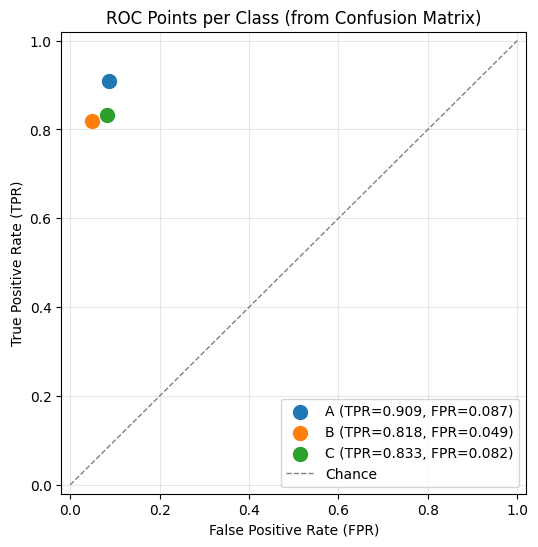

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#======================= BREAK ===========================
print("======================= BREAK ===========================")  # just a line


# Function to calculate per-class TPR/FPR
def multiclass_tpr_fpr_table(conf_matrix, class_names=None):
    n_classes = conf_matrix.shape[0]
    # n_classes → number of classes (rows in the confusion matrix).

    if class_names is None:
        class_names = [f'Class_{i}' for i in range(n_classes)]

    # If you don’t provide class names, it will just name them Class_0, Class_1, …


    rows = []


    for i in range(n_classes):
        TP = conf_matrix[i, i]
        FN = conf_matrix[i, :].sum() - TP
        FP = conf_matrix[:, i].sum() - TP
        TN = conf_matrix.sum() - (TP + FN + FP)

        # TP (True Positive) → diagonal element (correctly predicted for class i).
        # FN (False Negative) → row sum minus TP (actual class i but predicted other classes).
        # FP (False Positive) → column sum minus TP (predicted class i but actually other classes).
        # TN (True Negative) → everything else not in row/column i.



        TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

        # TPR (Recall/Sensitivity) → proportion of actual positives correctly detected.
        # FPR → proportion of actual negatives incorrectly predicted as positive.


        rows.append([class_names[i], TP, FN, FP, TN, round(TPR,3), round(FPR,3)])
        # Create a row for the current class with all metrics.

    df = pd.DataFrame(rows, columns=["Class","TP","FN","FP","TN","TPR","FPR"])
    # Turns list of rows into a table.
    # Easy to display metrics per class.

    return df


#--------- func end ---------


print("======================= BREAK ===========================")  # just a line



# Example confusion matrix
CM = np.array([[50, 2, 3],
               [4, 45, 6],
               [5, 3, 40]])
class_names = ['A','B','C']
df_table = multiclass_tpr_fpr_table(CM, class_names)  # calling Func here
# 3x3 matrix → 3 classes (A, B, C).


print("Per-class TPR & FPR table:\n")
display(df_table)



print("======================= BREAK ===========================")  # just a line




# ---------- Plot ROC “points” ----------
plt.figure(figsize=(6,6))
for i,row in df_table.iterrows():
    plt.scatter(row['FPR'], row['TPR'], label=f"{row['Class']} (TPR={row['TPR']}, FPR={row['FPR']})", s=100)

# Each class is plotted as a point (FPR on x-axis, TPR on y-axis).


# Chance line
plt.plot([0,1],[0,1], color='gray', lw=1, linestyle='--', label='Chance')
# Adds a diagonal “random guess” line for reference.


plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Points per Class (from Confusion Matrix)")
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')
plt.show()

# Makes the plot look nice, labels axes, adds grid and legend.




In [ ]:
Spring 25 Final QSN

In [26]:
import pandas as pd
dataset = pd.read_csv('Data1.csv')
X = dataset.iloc[:, :-1].values  # Features (Country, Age, Salary)
Y = dataset.iloc[:, -1].values   # Target (Purchased)

# X → all columns except last → independent variables: Country, Age, Salary
# Y → last column → dependent variable: Purchased


print(X)
print("============== BREAK ======================")

print(Y)

print("============== BREAK ======================")

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:, 1:3])  # Fit on Age and Salary columns
X[:, 1:3] = imputer.transform(X[:, 1:3])  # Replace NaN with mean
print(X)


print("================= BREAK ===================")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))
print(X[:, 0:3])



[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
============== BREAK ======================
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
============== BREAK ======================
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
================= BREAK ===================
[[1.0 0.0 0.0]
 [0.0 0.0 1.0]
 [0.0 1.0 0.0]
 [0.0 0.0 1.0]
 [0.0 1.0 0.0]
 [1.0 0.0 0.0]
 [0.0 0.0 1.0]
 [1.0 0.0 0.0]
 [0.0 1.0 0.0]
 [1.0 0.0 0.0]]
